In [1]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import *
from models import make_model
import porepy as pp

/home/porepy/porepy/src/porepy/numerics/nonlinear/nonlinear_solvers.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


# Barton-Bandis coefficient

In [2]:
solvers = [1, 2]
physics = [0]
barton_bandis = [0, 1, 2, 3]
friction = [1]

data = {}
names = {}
for i, [
    sol,
    bb,
    fr,
    ph,
] in enumerate(
    product(
        solvers,
        barton_bandis,
        friction,
        physics,
    )
):
    data[i] = load_data(f"../stats/stats_geo1x1_sol{sol}_ph{ph}_bb{bb}_fr{fr}.json")
    names[i] = f'Physics {ph} {"Richardson" if sol == 1 else "GMRES"} BB {bb} FR {fr}'


shape = [2, 4]
figsize = (15, 4)

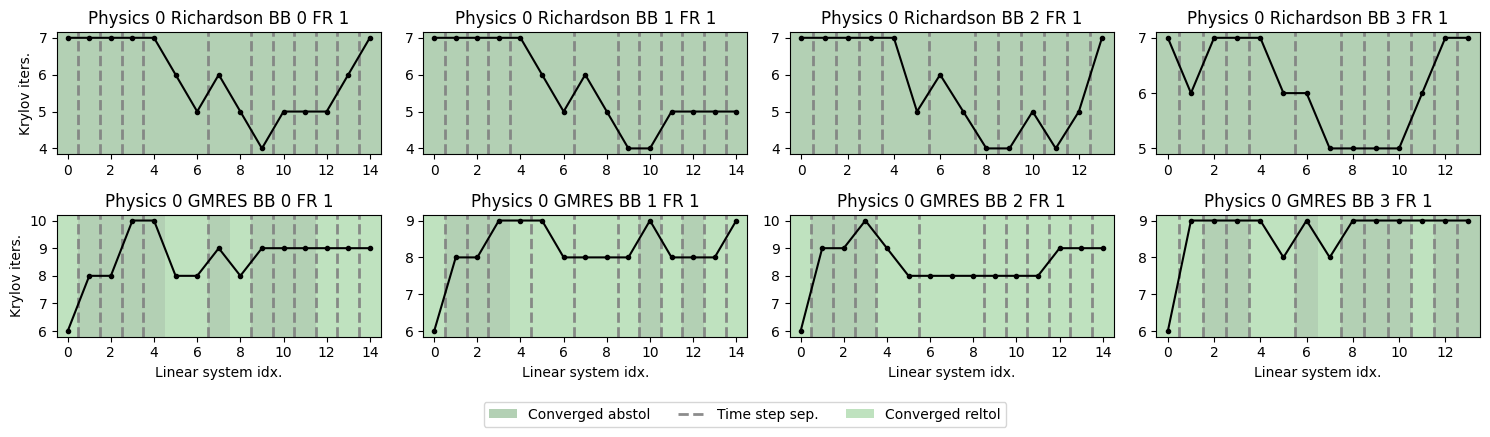

In [3]:
def render_element(entry: list[TimeStepStats]):
    color_converged_reason(entry)
    # color_sticking_sliding_open(entry)

    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    set_integer_ticks("vertical")
    plt.plot(get_gmres_iterations(entry), marker=".", color="black")


plot_grid(
    data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=names
)

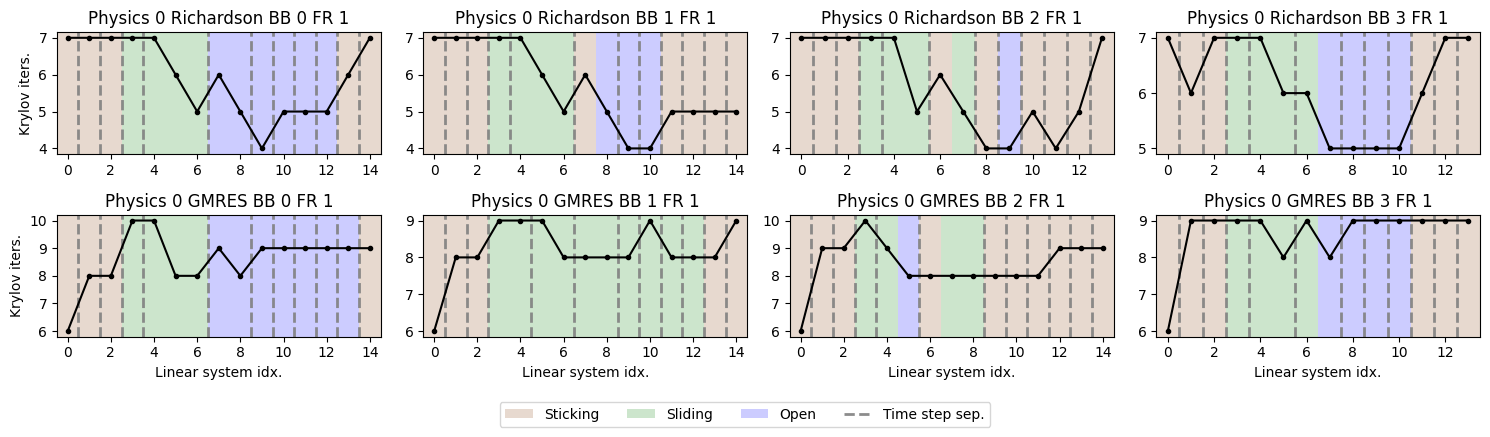

In [4]:
def render_element(entry: list[TimeStepStats]):
    # color_converged_reason(entry)
    color_sticking_sliding_open(entry)
    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    set_integer_ticks("vertical")
    plt.plot(get_gmres_iterations(entry), marker=".", color="black")

    coulomb_mismatch = [ls.coulomb_mismatch for ts in entry for ls in ts.linear_solves]
    sticking_ut = [ls.sticking_u_mismatch for ts in entry for ls in ts.linear_solves]
    lambdan_max = [ls.lambdan_max for ts in entry for ls in ts.linear_solves]
    lambdan_max[0] = 0
    lambdat_max = [ls.lambdat_max for ts in entry for ls in ts.linear_solves]
    ujumpn_max = [ls.un_max for ts in entry for ls in ts.linear_solves]
    ujumpt_max = [ls.ut_max for ts in entry for ls in ts.linear_solves]
    error_rotation = [ls.error_matrix_contribution for ts in entry for ls in ts.linear_solves]


    # plt.gca().twinx()
    # plt.yscale('log')
    # plt.plot(coulomb_mismatch, label="Coulomb mismatch")  # interesting
    # plt.plot(sticking_ut, label=r'Sticking $u_\tau$ mismatch')  # interesting
    # plt.plot(lambdan_max, label=r'$\lambda_n$ max')
    # plt.plot(lambdat_max, label=r'$\lambda_\tau$ max')
    # plt.plot(ujumpn_max, label=r"$u_n$ max")
    # plt.plot(ujumpt_max, label=r'$u_\tau$ max')
    # plt.plot(error_rotation, label="Error matrix contribution")  # interesting
    # plt.ylim(bottom=1e-6)


plot_grid(
    data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=names
)

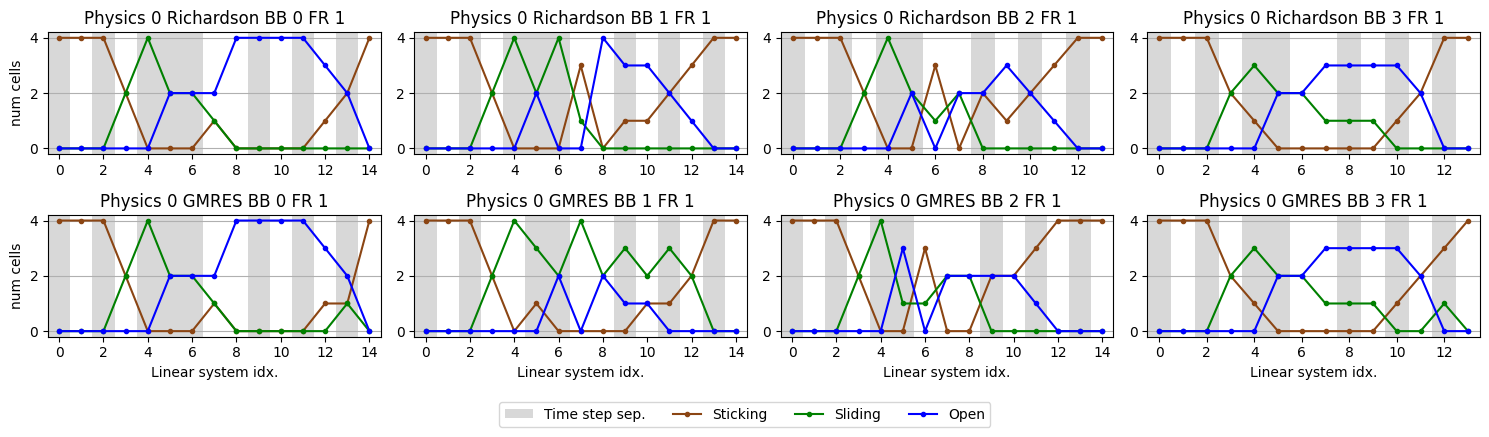

In [5]:
def render_element(i: int, entry: Sequence[TimeStepStats]):
    st, sl, op = get_num_sticking_sliding_open(entry)
    color_time_steps(entry, fill=True, grid=False, legend=True)
    plt.gca().grid(False)
    plt.gca().grid(True, which="major", axis="y")
    plt.plot(st, label="Sticking", marker=".", color=COLOR_STICKING)
    plt.plot(sl, label="Sliding", marker=".", color=COLOR_SLIDING)
    plt.plot(op, label="Open", marker=".", color=COLOR_OPEN)
    # plt.plot(tr, label="Transition", marker=".", color=COLOR_TRANSITION)


plot_grid(
    data,
    render_element,
    shape=shape,
    figsize=figsize,
    ylabel="num cells",
    ax_titles=names,
    #   ylabel="Fract. len., m"
)
# plt.savefig(save_path + 'fracture_length.pdf', bbox_inches='tight')

# Friction coef

In [6]:
solvers = [1, 2]
physics = [0]
barton_bandis = [2]
friction = [0, 1, 2]

data = {}
names = {}
for i, [
    sol,
    bb,
    fr,
    ph,
] in enumerate(
    product(
        solvers,
        barton_bandis,
        friction,
        physics,
    )
):
    data[i] = load_data(f"../stats/stats_geo1x1_sol{sol}_ph{ph}_bb{bb}_fr{fr}.json")
    names[i] = f'Physics {ph} {"Richardson" if sol == 1 else "GMRES"} BB {bb} FR {fr}'


shape = [2, 3]
figsize = (12, 4)

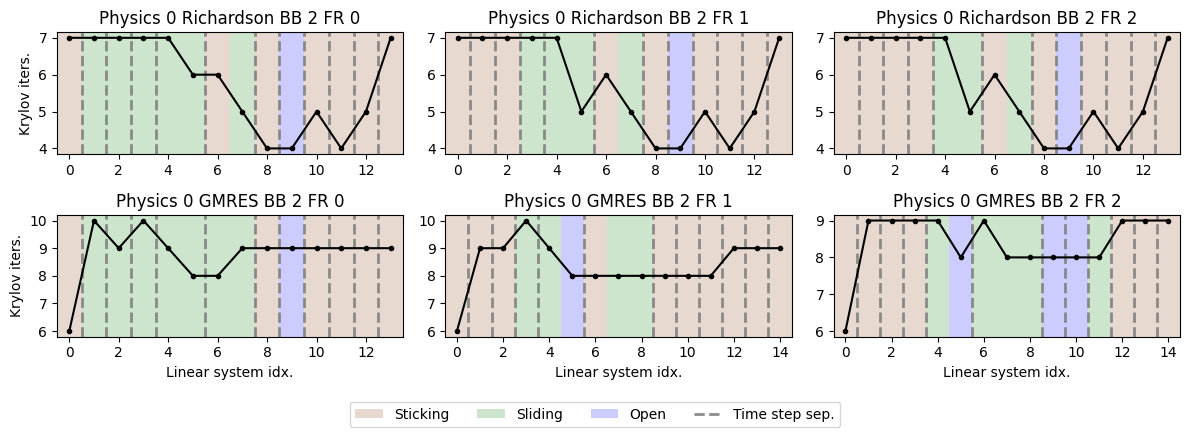

In [7]:
def render_element(entry: list[TimeStepStats]):
    # color_converged_reason(entry)
    color_sticking_sliding_open(entry)

    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    set_integer_ticks("vertical")
    plt.plot(get_gmres_iterations(entry), marker=".", color="black")


plot_grid(
    data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=names
)

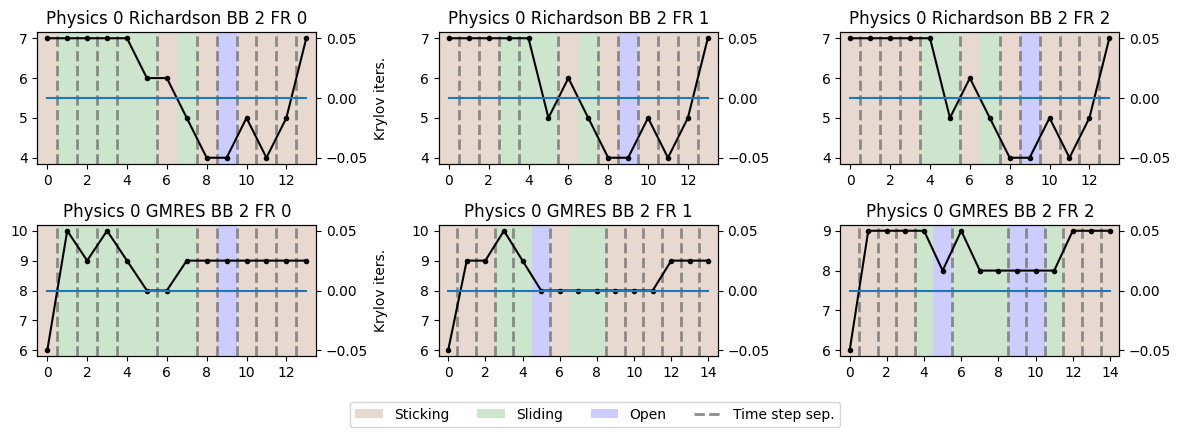

In [8]:
def render_element(entry: list[TimeStepStats]):
    # color_converged_reason(entry)
    color_sticking_sliding_open(entry)
    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    set_integer_ticks("vertical")
    plt.plot(get_gmres_iterations(entry), marker=".", color="black")

    coulomb_mismatch = [ls.coulomb_mismatch for ts in entry for ls in ts.linear_solves]
    sticking_ut = [ls.sticking_u_mismatch for ts in entry for ls in ts.linear_solves]
    lambdan_max = [ls.lambdan_max for ts in entry for ls in ts.linear_solves]
    lambdan_max[0] = 0
    lambdat_max = [ls.lambdat_max for ts in entry for ls in ts.linear_solves]
    ujumpn_max = [ls.un_max for ts in entry for ls in ts.linear_solves]
    ujumpt_max = [ls.ut_max for ts in entry for ls in ts.linear_solves]

    plt.gca().twinx()
    # plt.yscale('log')
    # plt.plot(coulomb_mismatch, label='Coulomb mismatch')  # interesting
    plt.plot(sticking_ut, label=r"Sticking $u_\tau$ mismatch")  # interesting
    # plt.plot(lambdan_max, label=r'$\lambda_n$ max')
    # plt.plot(lambdat_max, label=r'$\lambda_\tau$ max')
    # plt.plot(ujumpn_max, label=r"$u_n$ max")
    # plt.plot(ujumpt_max, label=r'$u_\tau$ max')
    # plt.ylim(bottom=1e-6)


plot_grid(
    data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=names
)

# Num iterations table

In [9]:
import pandas as pd

barton_bandis = [0, 1, 2, 3, 4, 5]
friction = [0, 1, 2]

table = []
for fr in friction:
    table.append([])
    for bb in barton_bandis:
        entry = load_data(f"../stats/stats_geo1x1_sol{1}_ph{0}_bb{bb}_fr{fr}.json")
        num_gmres = get_gmres_iterations(entry)
        table[-1].append(round(np.mean(num_gmres), 2))

table = pd.DataFrame(
    table,
    index=["$F=0.1$", "$F=0.577$", "$F=0.8$"],
    # columns=["BB off", "BB low", "BB medium", "BB high"],
    columns=["BB off", "BB 1e5", "BB 1e9", "BB 1e13", 'BB 1e17', 'BB 1e20'],
)
table

,BB off,BB 1e5,BB 1e9,BB 1e13,BB 1e17,BB 1e20
$F=0.1$,6.00,5.79,5.79,6.07,6.21,6.21
$F=0.577$,5.93,5.67,5.71,6.14,6.21,6.21
$F=0.8$,6.00,5.71,5.71,6.14,6.21,6.21


In [10]:
print(table.to_latex(float_format='%.2f'))

\begin{tabular}{lrrrrrr}
\toprule
 & BB off & BB 1e5 & BB 1e9 & BB 1e13 & BB 1e17 & BB 1e20 \\
\midrule
$F=0.1$ & 6.00 & 5.79 & 5.79 & 6.07 & 6.21 & 6.21 \\
$F=0.577$ & 5.93 & 5.67 & 5.71 & 6.14 & 6.21 & 6.21 \\
$F=0.8$ & 6.00 & 5.71 & 5.71 & 6.14 & 6.21 & 6.21 \\
\bottomrule
\end{tabular}



# Grid refinement

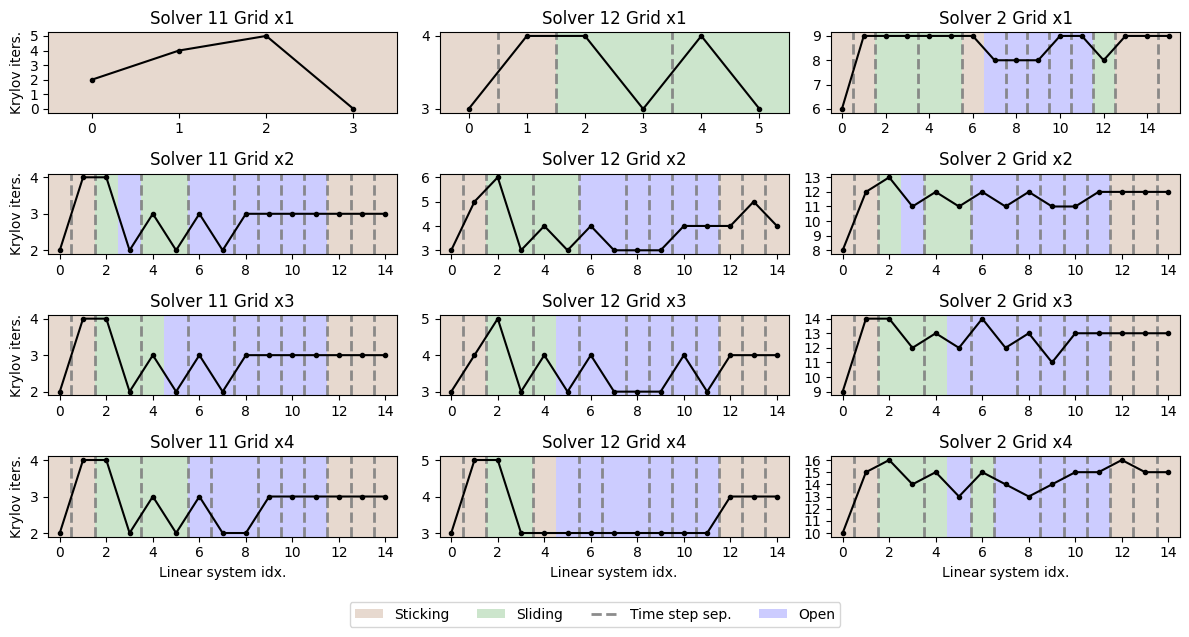

In [11]:
solvers = [11, 12, 2]
ph = 1
bb = 2
fr = 1
grid_refinement = [1, 2, 3, 4]

data = {}
names = {}
for i, [g, sol] in enumerate(product(grid_refinement, solvers)):
    data[i] = load_data(f"../stats/stats_geo1x{g}_sol{sol}_ph{ph}_bb{bb}_fr{fr}.json")
    names[i] = f"Solver {sol} Grid x{g}"


shape = [4, 3]
figsize = (12, 6)


def render_element(entry: list[TimeStepStats]):
    # color_converged_reason(entry)
    color_sticking_sliding_open(entry)

    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    set_integer_ticks("vertical")
    plt.plot(get_gmres_iterations(entry), marker=".", color="black")


plot_grid(
    data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=names
)

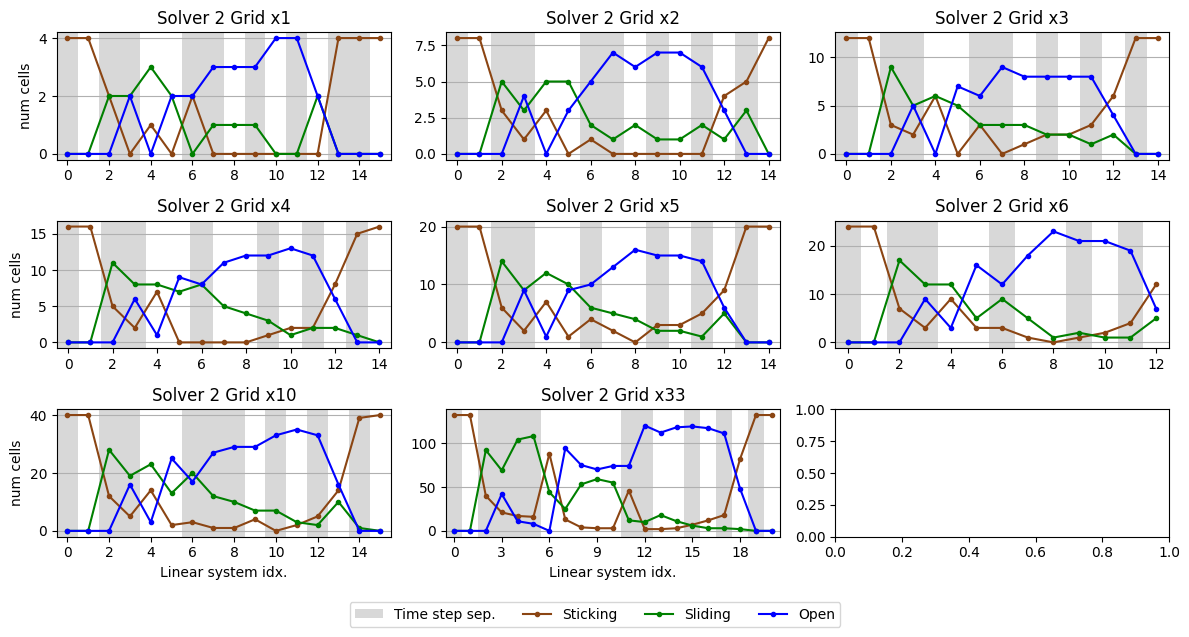

In [12]:
solvers = [2]
ph = 1
bb = 2
fr = 1
grid_refinement = [1, 2, 3, 4, 5, 6, 10, 33]

data = {}
names = {}
for i, [g, sol] in enumerate(product(grid_refinement, solvers)):
    data[i] = load_data(f"../stats/stats_geo1x{g}_sol{sol}_ph{ph}_bb{bb}_fr{fr}.json")
    names[i] = f"Solver {sol} Grid x{g}"


shape = [3, 3]
figsize = (12, 6)

def render_element(i: int, entry: Sequence[TimeStepStats]):
    st, sl, op = get_num_sticking_sliding_open(entry)
    color_time_steps(entry, fill=True, grid=False, legend=True)
    plt.gca().grid(False)
    plt.gca().grid(True, which="major", axis="y")
    plt.plot(st, label="Sticking", marker=".", color=COLOR_STICKING)
    plt.plot(sl, label="Sliding", marker=".", color=COLOR_SLIDING)
    plt.plot(op, label="Open", marker=".", color=COLOR_OPEN)
    # plt.plot(tr, label="Transition", marker=".", color=COLOR_TRANSITION)


plot_grid(
    data,
    render_element,
    shape=shape,
    figsize=figsize,
    ylabel="num cells",
    ax_titles=names,
    #   ylabel="Fract. len., m"
)
# plt.savefig(save_path + 'fracture_length.pdf', bbox_inches='tight')

In [20]:
from collections import defaultdict
import pandas as pd

table = defaultdict(lambda: [])

NDIGITS = 2

grid_refinement = [1, 2, 3, 4, 5, 6, 10, 33]

for g in grid_refinement:
    stats_name = f"stats_geo1x{g}_sol{2}_ph{1}_bb{2}_fr{1}.json"
    entry = load_data(f"../stats/{stats_name}")
    dofs_info = load_data(f"../stats/dofs_info_{stats_name}")
    total_dofs = (
        dofs_info["block 0"]
        + dofs_info["block 1"]
        + dofs_info["block 2"]
        + dofs_info["block 3"]
        + dofs_info["block 4"]
        + dofs_info["block 5"]
    )
    # table["Refinement level"].append(f"x{g}")
    name1 = "$P_1, Q_r$"
    name2 = "$P_2, $ dir."
    table["Total DoFs"].append(total_dofs)
    try:
        table[name1].append(
            round(
                np.mean(
                    get_gmres_iterations(
                        load_data(f"../stats/stats_geo1x{g}_sol{11}_ph{1}_bb{2}_fr{1}.json")
                    )
                ),
                NDIGITS
            )
        )
        table[name2].append(
            round(
                np.mean(
                    get_gmres_iterations(
                        load_data(f"../stats/stats_geo1x{g}_sol{12}_ph{1}_bb{2}_fr{1}.json")
                    )
                ),
                NDIGITS
            )
        )
    except FileNotFoundError:
        table[name1].append('-')
        table[name2].append('-')
    table["$P_2, $ AMG"].append(round(np.mean(get_gmres_iterations(entry))))
    table['Newton iters.'].append(round(np.mean(get_newton_iterations(entry)), NDIGITS))

table = pd.DataFrame(table).T
table.rename(columns=table.iloc[0], inplace=True)
table = table[1:]
table.columns.name = 'Total DoFs'
table

Total DoFs,768,2964,6534,11280,17670,25668,70200,757014
"$P_1, Q_r$",2.75,2.87,2.87,2.8,-,-,-,-
"$P_2, $ dir.",3.5,3.87,3.6,3.47,-,-,-,-
"$P_2, $ AMG",9,11,13,14,15,16,17,24
Newton iters.,1.33,1.25,1.25,1.25,1.25,1.25,1.33,1.75


In [14]:
print(table.to_latex(float_format=f'%.{NDIGITS}f'))

\begin{tabular}{lllllllll}
\toprule
Total DoFs & 768 & 2964 & 6534 & 11280 & 17670 & 25668 & 70200 & 757014 \\
\midrule
$P_1, Q_r$ & 2.75 & 2.87 & 2.87 & 2.80 & - & - & - & - \\
$P_2, $ dir. & 3.50 & 3.87 & 3.60 & 3.47 & - & - & - & - \\
$P_2, $ AMG & 9 & 11 & 13 & 14 & 15 & 16 & 17 & 24 \\
Newton iters. & 1.33 & 1.25 & 1.25 & 1.25 & 1.25 & 1.30 & 1.33 & 1.75 \\
\bottomrule
\end{tabular}



Reasons:
1. FS
2. Interfaces (rotation and fluid flow)
3. Mechanics amg is bad
4. Flow amg is bad

TODO: Investigate the peak. Is it conditioning issue?

TODO: Refinement level with direct subsolvers (only FS)

TODO: Invert interface flow directly

TODO: Change setup to make the injection-production transition smoother